# Contents:
* [Introduction](#Introduction)
* [Getting Started](#Getting-Started)
* [Time Series Data](#Time-Series-Data)
* [Data Analysis](#Some-Analysis)
    * [Returns](#Returns)
    * [Visualize the Data](#Visualize-the-data)
    * [Moving Windows](#Moving-Windows)
    * [Volatility Calculations](#Volatility-Calculations)
    * [Ordinary Least Squares Regression / Linear Regression](#Ordinary-Least-Squares-Regression-(OLS))
* [Compound Annual Growth Rate](#Compound-Annual-Growth-Rate-(CAGR))

# Introduction

The open-source community has a lot to offer in terms of financial data.  In this notebook we show ways of retrieving data using the Yahoo! Finance API. Once the data is stored in a DataFrame, we show differnt types of analyses you can perform.

Check you have recent version of the needed packages.

See links for more on [pandas_datareader](https://pypi.org/project/pandas-datareader/) and [yfinance](https://github.com/ranaroussi/yfinance).  Note `yfinance` is [fix-yahoo-finance](https://pypi.org/project/fix-yahoo-finance/0.1.30/) renamed.

For information on `quandl` see this [link](https://www.quandl.com/tools/python).

# Getting Started

In [9]:
%load_ext watermark
%watermark -p pandas,numpy,matplotlib,pandas_datareader,yfinance,quandl

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
pandas 0.25.3
numpy 1.17.3
matplotlib 3.1.2
pandas_datareader 0.8.1
yfinance 0.1.52
quandl 3.4.6


Import packages you need

In [6]:
import pandas as pd
import numpy as np
import quandl 
import datetime
import matplotlib.pyplot as plt

Import the data from the API.  

Because of the changes to the Yahoo! Finance API many programs that rely on it have stopped working. That's why we don't only use the `pandas_datareader` package, but also a custom fix `yfinance` to get the data:

`yfinance` fixes the problem by scraping the data from Yahoo! finance and returning a Pandas DataFrame in the same format as `pandas_datareader’s get_data_yahoo()`.

By basically “hijacking” `pandas_datareader.data.get_data_yahoo()` method, `yfinance’s` implementation is easy and only requires to import `yfinance` into your code.

In [19]:
from pandas_datareader import data as pdr
import yfinance as yf

yf.pdr_override() 

# download dataframe
aapl = pdr.get_data_yahoo('AAPL', 
                          start=datetime.datetime(2006, 10, 1), 
                          end=datetime.datetime(2012, 1, 1))

aapl.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,9.305108,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,9.208156,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,9.369746,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,9.301377,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,9.225556,116739700


If you don't want to make use of pandas_reader package, there is an alternataive.  You can also use Quandl to retrieve data:

In [15]:
aapl2 = quandl.get("WIKI/AAPL")
aapl2.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [17]:
aapl_ = quandl.get("WIKI/AAPL", start_date="2006-10-01", end_date="2012-01-01")
aapl_.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-10-02,75.10,75.870,74.30,74.86,25451400.0,0.0,1.0,9.651397,9.750352,9.548586,9.620553,178159800.0
2006-10-03,74.45,74.950,73.19,74.07,28239600.0,0.0,1.0,9.567863,9.632120,9.405935,9.519027,197677200.0
2006-10-04,74.10,75.462,73.16,75.38,29610100.0,0.0,1.0,9.522883,9.697919,9.402080,9.687381,207270700.0
2006-10-05,74.53,76.160,74.13,74.83,24424400.0,0.0,1.0,9.578144,9.787621,9.526738,9.616698,170970800.0
2006-10-06,74.42,75.040,73.81,74.22,16677100.0,0.0,1.0,9.564007,9.643686,9.485614,9.538304,116739700.0


Alternatively, you can load in a dataset that has been retrieved for you already from Yahoo! Finance.  This would apply if your company, for example, stores data in the AWS cloud in an S3 bucket: 

In [20]:
aapl3 = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/aapl.csv", 
                    header=0, index_col= 0, names=['Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], 
                    parse_dates=True)
aapl3.head()

,Open,High,Low,Close,Volume,Adj Close
2006-10-02,75.10,75.87,74.30,74.860001,178159800.0,10.694285
2006-10-03,74.45,74.95,73.19,74.080002,197677200.0,10.582857
2006-10-04,74.10,75.46,73.16,75.380005,207270700.0,10.768572
2006-10-05,74.53,76.16,74.13,74.829994,170970800.0,10.690000
2006-10-06,74.42,75.04,73.81,74.220001,116739700.0,10.602858


## Time Series Data

A time series is a sequence of numerical data points taken at successive equally spaced points in time. In investing, a time series tracks the movement of the chosen data points, such as the stock price, over a specified period of time with data points recorded at regular intervals. 

In [21]:
# Inspect the index 
aapl.index

# Inspect the columns
aapl.columns

# Select only the last 10 observations of `Close`
ts = aapl['Close'][-10:]

# Check the type of `ts` 
type(ts)

pandas.core.series.Series

In [23]:
# Inspect the first rows of November-December 2006
print(aapl.loc[pd.Timestamp('2006-11-01'):pd.Timestamp('2006-12-31')].head())

# Inspect the first rows of 2007 
print(aapl.loc['2007'].head())

# Inspect November 2006
print(aapl.iloc[22:43])

# Inspect the 'Open' and 'Close' values at 2006-11-01 and 2006-12-01
print(aapl.iloc[[22,43], [0, 3]])

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2006-11-01  11.585714  11.625714  11.194285  11.308572   9.839600  152798100
2006-11-02  11.274285  11.331429  11.214286  11.282857   9.817224  116370800
2006-11-03  11.337143  11.361428  11.112857  11.184286   9.731457  107972200
2006-11-06  11.278571  11.437143  11.204286  11.387143   9.907964  108644200
2006-11-07  11.492857  11.571428  11.447143  11.501429  10.007404  131483100
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2007-01-03  12.327143  12.368571  11.700000  11.971429  10.416352  309579900
2007-01-04  12.007143  12.278571  11.974286  12.237143  10.647548  211815100
2007-01-05  12.252857  12.314285  12.057143  12.150000  10.571726  208685400
2007-01-08  12.280000  12.361428  12.182858  12.210000  10.623935  199276700

In [24]:
# Sample 20 rows
sample = aapl.sample(20)

# Print `sample`
print(sample)

# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
print(monthly_aapl)


                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2011-06-08  47.397144  47.828571  47.235714  47.462856  41.297478   83430900
2011-07-15  51.595715  52.142857  51.310001  52.131428  45.359615  121116800
2011-04-29  49.540001  50.564285  49.524284  50.018570  43.521210  251586300
2011-04-18  46.585712  47.461430  45.737144  47.407143  41.248997  152474700
2010-08-11  36.485714  36.527142  35.687141  35.741428  31.098642  155013600
2010-02-17  29.170000  29.187143  28.694286  28.935715  25.176991  109099200
2006-11-02  11.274285  11.331429  11.214286  11.282857   9.817224  116370800
2011-02-25  49.322857  49.775715  49.257141  49.737144  43.276337   95004700
2008-02-15  18.038572  18.154285  17.722857  17.804285  15.491525  225325100
2008-11-25  13.518572  13.530000  12.594286  12.971429  11.286451  308823200
2007-02-14  12.090000  12.234285  12.081429  12.185715  10.602801  126995400

In [26]:
# Add a column `diff` to `aapl` 
aapl['diff'] = aapl.Open - aapl.Close

aapl.head()

,Open,High,Low,Close,Adj Close,Volume,diff
Date,,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,9.305108,178159800,0.034286
2006-10-03,10.635715,10.707143,10.455714,10.582857,9.208156,197677200,0.052857
2006-10-04,10.585714,10.780000,10.451428,10.768572,9.369746,207270700,-0.182858
2006-10-05,10.647142,10.880000,10.590000,10.690000,9.301377,170970800,-0.042857
2006-10-06,10.631429,10.720000,10.544286,10.602858,9.225556,116739700,0.028571


In [27]:
# Delete the new `diff` column
del aapl['diff']
aapl.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-02,10.728572,10.838572,10.614285,10.694285,9.305108,178159800
2006-10-03,10.635715,10.707143,10.455714,10.582857,9.208156,197677200
2006-10-04,10.585714,10.780000,10.451428,10.768572,9.369746,207270700
2006-10-05,10.647142,10.880000,10.590000,10.690000,9.301377,170970800
2006-10-06,10.631429,10.720000,10.544286,10.602858,9.225556,116739700


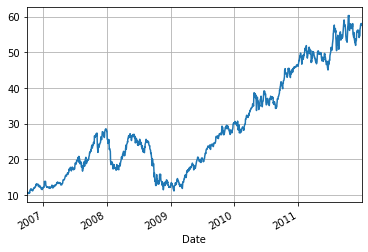

In [28]:
# Import Matplotlib's `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Plot the closing prices for `aapl`
aapl['Close'].plot(grid=True)

# Show the plot
plt.show()

## Some Analysis

### Returns

The simple daily percentage change doesn’t take into account dividends and other factors and represents the amount of percentage change in the value of a stock over a single day of trading. To calcuate the daily percentage change use the `pct_change()` function included in the Pandas package:

In [29]:
# Assign `Adj Close` to `daily_close`
daily_close = aapl[['Adj Close']]

# Daily returns
daily_pct_c = daily_close.pct_change()

# Replace NA values with 0
daily_pct_c.fillna(0, inplace=True)

# Inspect daily returns
print(daily_pct_c)

# Daily log returns
daily_log_returns = np.log(daily_close.pct_change()+1)

# Print daily log returns
print(daily_log_returns)

            Adj Close
Date                 
2006-10-02   0.000000
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]
            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010474
2006-10-04   0.017396
2006-10-05  -0.007324
2006-10-06  -0.008185
...               ...
2011-12-23   0.011922
2011-12-27   0.007903
2011-12-28  -0.009615
2011-12-29   0.006141
2011-12-30  -0.000296

[1323 rows x 1 columns]


In [30]:

# Resample `aapl` to business months, take last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()

# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2006-10-31,NaN,NaN,NaN,NaN,NaN,NaN
2007-02-28,0.125777,0.126451,0.121460,0.122860,0.122860,0.369611
2007-06-30,0.196030,0.195413,0.198331,0.197735,0.197735,-0.080296
2007-10-31,0.400961,0.404613,0.392010,0.400796,0.400796,0.306882
2008-02-29,0.127066,0.130711,0.117746,0.120394,0.120394,0.172293
2008-06-30,-0.003550,-0.004290,0.005927,0.003673,0.003673,-0.209762
2008-10-31,-0.114267,-0.108879,-0.124618,-0.118803,-0.118803,0.133219
2009-02-28,-0.363639,-0.363388,-0.359305,-0.360865,-0.360865,-0.161601
2009-06-30,0.312134,0.304359,0.324702,0.316588,0.316588,-0.386935


In [31]:

# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)


            Adj Close
Date                 
2006-10-02        NaN
2006-10-03  -0.010419
2006-10-04   0.017549
2006-10-05  -0.007297
2006-10-06  -0.008152
...               ...
2011-12-23   0.011993
2011-12-27   0.007934
2011-12-28  -0.009569
2011-12-29   0.006159
2011-12-30  -0.000296

[1323 rows x 1 columns]


You can plot the distribution.  You'll see below, the distribution looks very symmetrical and normally distributed (i.e., the daily changes center around the bin 0.00). 

Note, though, how you can and should use the results of the describe() function, applied on daily_pct_c, to correctly interpret the results of the histogram. You will see that the mean is very close to the 0.00 bin also and that the standard deviation is 0.02. Also, take a look at the percentiles to know how many of your data points fall below -0.010672, 0.001677 and 0.014306.

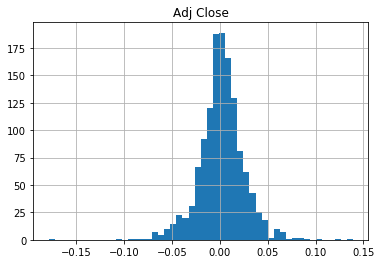

         Adj Close
count  1322.000000
mean      0.001566
std       0.023992
min      -0.179195
25%      -0.010672
50%       0.001677
75%       0.014306
max       0.139049


In [32]:

# Import matplotlib
import matplotlib.pyplot as plt

# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

# Pull up summary statistics
print(daily_pct_c.describe())

In [33]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj Close
Date                 
2006-10-02        NaN
2006-10-03   0.989581
2006-10-04   1.006947
2006-10-05   0.999599
2006-10-06   0.991451
...               ...
2011-12-23   5.387789
2011-12-27   5.430537
2011-12-28   5.378574
2011-12-29   5.411703
2011-12-30   5.410099

[1323 rows x 1 columns]


You can use can again use Matplotlib to quickly plot the cum_daily_return

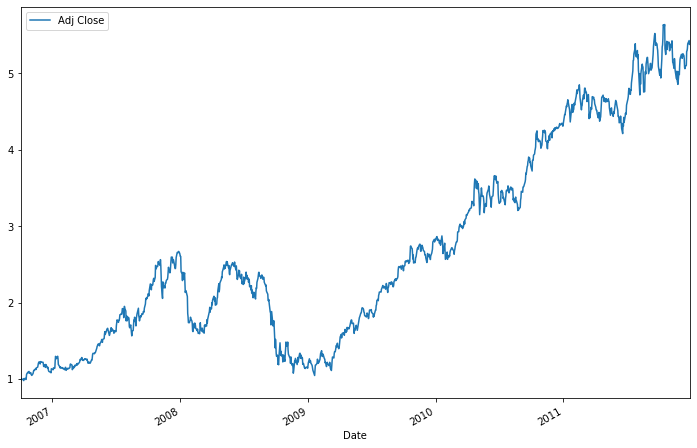

In [34]:
# Import matplotlib
import matplotlib.pyplot as plt 

# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [35]:

# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)

            Adj Close
Date                 
2006-10-31   1.031710
2006-11-30   1.140058
2006-12-31   1.155110
2007-01-31   1.187303
2007-02-28   1.145176
...               ...
2011-08-31   5.032896
2011-09-30   5.243032
2011-10-31   5.306305
2011-11-30   5.140465
2011-12-31   5.248871

[63 rows x 1 columns]


In the code below, we define a function then use it so that the stock data from Apple, Microsoft, IBM, and Google are loaded and gathered into one big DataFrame:

In [37]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (pdr.get_data_yahoo(ticker, start=startdate, end=enddate))
    datas = map(data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2006, 10, 1), datetime.datetime(2012, 1, 1))
all_data.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close  \
Ticker Date                                                                
AAPL   2006-10-02  10.728572  10.838572  10.614285  10.694285   9.305108   
       2006-10-03  10.635715  10.707143  10.455714  10.582857   9.208156   
       2006-10-04  10.585714  10.780000  10.451428  10.768572   9.369746   
       2006-10-05  10.647142  10.880000  10.590000  10.690000   9.301377   
       2006-10-06  10.631429  10.720000  10.544286  10.602858   9.225556   

                      Volume  
Ticker Date                   
AAPL   2006-10-02  178159800  
       2006-10-03  197677200  
       2006-10-04  207270700  
       2006-10-05  170970800  
       2006-10-06  116739700

In [38]:
all_data.tail()

Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
GOOG   2011-12-23  314.819977  316.154968  314.102661  315.387848  315.387848   
       2011-12-27  314.844879  321.041656  314.819977  318.929565  318.929565   
       2011-12-28  320.174896  321.295715  317.858582  318.655609  318.655609   
       2011-12-29  319.547272  320.299438  316.414001  320.000549  320.000549   
       2011-12-30  319.811279  322.172424  319.811279  321.744019  321.744019   

                    Volume  
Ticker Date                 
GOOG   2011-12-23  2918200  
       2011-12-27  3224800  
       2011-12-28  4270200  
       2011-12-29  3162500  
       2011-12-30  3577800

### Visualize the data

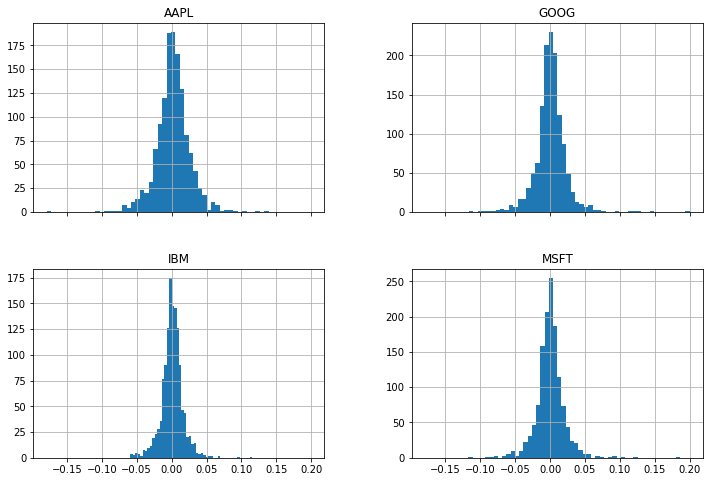

In [39]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

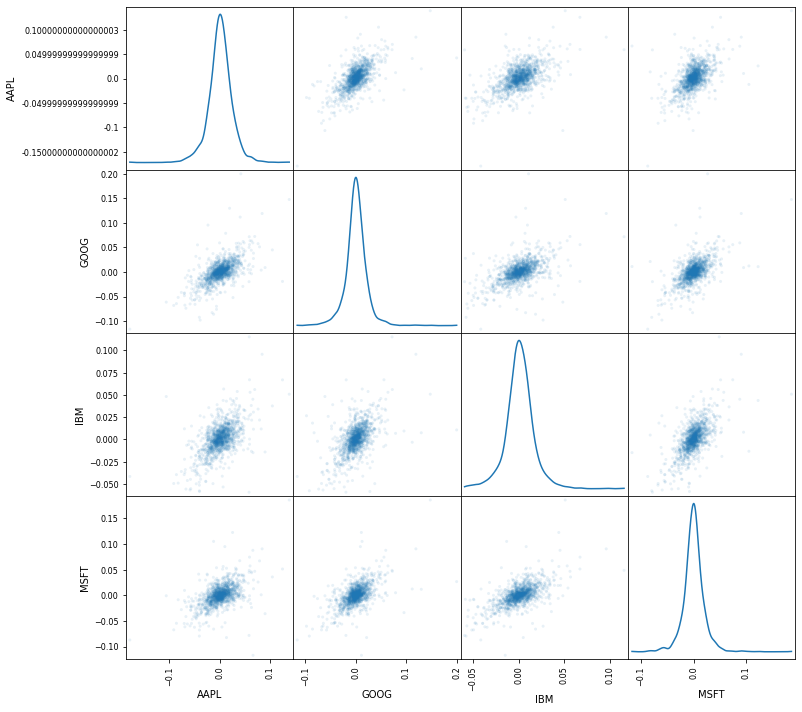

In [41]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()


### Moving Windows

Moving windows are there when you compute the statistic on a window of data represented by a particular period of time and then slide the window across the data by a specified interval. That way, the statistic is continually calculated as long as the window falls first within the dates of the time series.

There are a lot of [functions](https://pandas.pydata.org/pandas-docs/version/0.17.0/api.html#standard-moving-window-functions) in Pandas to calculate moving windows.

In [42]:

# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2011-12-16    48.316426
2011-12-19    48.283300
2011-12-20    48.252784
2011-12-21    48.248683
2011-12-22    48.242312
2011-12-23    48.238086
2011-12-27    48.242995
2011-12-28    48.236345
2011-12-29    48.263101
2011-12-30    48.286687
Name: Adj Close, dtype: float64

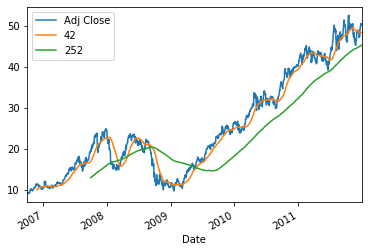

In [43]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj Close', '42', '252']].plot()

plt.show()

### Volatility Calculations

The volatility of a stock is a measurement of the change in variance in the returns of a stock over a specific period of time. It is common to compare the volatility of a stock with another stock to get a feel for which may have less risk or to a market index to examine the stock’s volatility in the overall market. Generally, the higher the volatility, the riskier the investment in that stock, which results in investing in one over another.

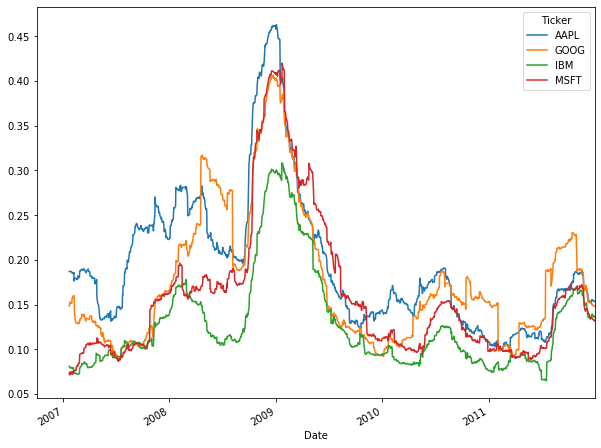

In [44]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

### Ordinary Least-Squares Regression (OLS)
AKA Linear Regression

A more statistical analysis of your financial data, with a more traditional regression analysis, such as the Ordinary Least-Squares Regression.

To do this, we use the `statsmodels` library, which not only provides you with the classes and functions to estimate many different statistical models but also allows you to conduct statistical tests and perform statistical data exploration.

In [51]:
# Import the `api` model of `statsmodels` under alias `sm`
import statsmodels.api as sm
from pandas import tseries
import pandas.core

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     515.5
Date:                Tue, 24 Dec 2019   Prob (F-statistic):           1.33e-96
Time:                        20:00:59   Log-Likelihood:                 3514.0
No. Observations:                1322   AIC:                            -7024.
Df Residuals:                    1320   BIC:                            -7014.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.000     -1.119      0.2

/home/jennifp3/miniconda3/envs/finance/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


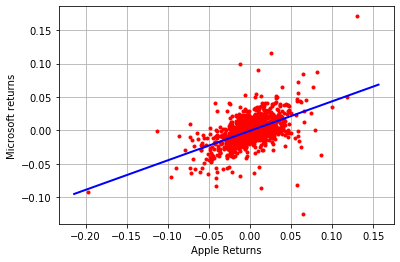

In [52]:
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)

plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

plt.show()

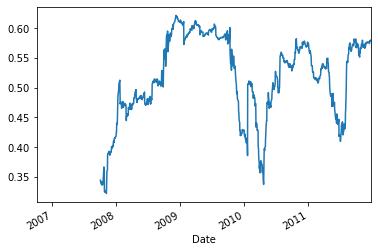

In [53]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()
plt.show()


## Compound Annual Growth Rate (CAGR)

he Compound Annual Growth Rate (CAGR), which provides you with a constant rate of return over the time period. In other words, the rate tells you what you really have at the end of your investment period.

Note that, in the code chunk below, we consider days, so 1 is adjusted to 365 days (which is equal to 1 year).

In [54]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj Close'][-1]) / aapl['Adj Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.3823445209865286
